<a href="https://colab.research.google.com/github/Vaggelis-Arg/Amazon-Ecommerce-Analysis/blob/main/Amazon_Ecommerce_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Mining (2024-2025)

### Team Information

#### Team member #1: [**Vaggelis-Arg**](https://github.com/Vaggelis-Arg)
* Name: Evangelos Argyropoulos
* ID: sdi2200010
* Email: sdi2200010@di.uoa.gr
---
#### Team member #2: [**chrisvl11**](https://github.com/chrisvl11)
* Name: Christos Vladikas
* ID: sdi2200020
* Email: sdi2200020@di.uoa.gr
---
#### Team member #3: [**tonykalantzis**](https://github.com/tonykalantzis)
* Name: Antonios Panagiotis Kalatzis
* ID: sdi2100046
* Email: sdi2100046@di.uoa.gr
---

## Set up of the notebook

### Downloads

In [1]:
!pip install nltk transformers torch contractions matplotlib seaborn wordcloud hf_xet scikit-learn
!pip install -U datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 27.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 71.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.3/118.3 kB 5.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.9.41
    Uninstalling nvidia-nvjitlink-cu12-12.9.41:
      Successfully uninstalled nvidia-nvjitlink-cu12-12.9.41
  Attempting uninstall: nvidia-curand-cu12
    Found existing i

### Remove any leftover datasets from previous runs

In [2]:
!rm -f *.csv

### Imports

In [3]:
import nltk
nltk.download(['punkt', 'stopwords', 'vader_lexicon', 'wordnet','omw-1.4', 'punkt_tab'])
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from datasets import load_dataset
import pandas as pd
import re
import string
import contractions
from datasets import load_dataset
from matplotlib.gridspec import GridSpec
import numpy as np
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from transformers import pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from scipy.sparse import hstack
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from gensim.models import KeyedVectors

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...
[nltk_data] Downloading package punkt_tab to /usr/share/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
2025-05-19 09:08:15.553854: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747645695.812125      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: A

## Part 1 - Pre-processing

### Task 1: Data Exploration and Feature Engineering

#### Dataset Preparation

We used the `datasets` library from Hugging Face to stream and extract reviews and metadata for selected Amazon product categories.

The dataset includes product reviews, ratings, and associated metadata. After loading, the data was saved as CSV files (`*_reviews_raw.csv` and `*_metadata_raw.csv`) to simplify further processing.

We ensure the CSVs contain essential fields like `rating`, `text`, `parent_asin`, and product details for later analysis.



In [4]:
# Configs: (category_name, review_config, meta_config)
datasets_info = [
    ("Books", "raw_review_Books", "raw_meta_Books"),
    ("All_Beauty", "raw_review_All_Beauty", "raw_meta_All_Beauty"),
    ("Electronics", "raw_review_Electronics", "raw_meta_Electronics"),
    ("Movies_and_TV", "raw_review_Movies_and_TV", "raw_meta_Movies_and_TV"),
    ("Sports_and_Outdoors", "raw_review_Sports_and_Outdoors", "raw_meta_Sports_and_Outdoors"),
]

# Select correct columns
review_columns = [
    "rating", "title", "text", "parent_asin", "user_id", "timestamp",
    "helpful_vote", "verified_purchase"
]
meta_columns = [
    "parent_asin", "main_category", "title", "average_rating", "rating_number",
    "description", "price", "categories", "bought_together", "store"
]

for category, review_config, metadata_config in datasets_info:
    print(f"Loading: {category}")

    # Load streaming datasets with limited columns
    reviews_iter = load_dataset(
        "McAuley-Lab/Amazon-Reviews-2023",
        review_config,
        split="full",
        streaming=True,
        trust_remote_code=True
    ).select_columns(review_columns)

    metadata_iter = load_dataset(
        "McAuley-Lab/Amazon-Reviews-2023",
        metadata_config,
        split="full",
        streaming=True,
        trust_remote_code=True
    ).select_columns(meta_columns)

    # Convert to pandas and save
    reviews_df = pd.DataFrame(reviews_iter.take(200_000))
    metadata_df = pd.DataFrame(metadata_iter.take(200_000))

    reviews_df.to_csv(f"{category}_reviews_selected.csv", index=False)
    metadata_df.to_csv(f"{category}_metadata_selected.csv", index=False)

    print(f"Saved selected columns for {category}")


Loading: Books


README.md:   0%|          | 0.00/30.3k [00:00<?, ?B/s]

Amazon-Reviews-2023.py:   0%|          | 0.00/39.6k [00:00<?, ?B/s]

Saved selected columns for Books
Loading: All_Beauty
Saved selected columns for All_Beauty
Loading: Electronics
Saved selected columns for Electronics
Loading: Movies_and_TV
Saved selected columns for Movies_and_TV
Loading: Sports_and_Outdoors
Saved selected columns for Sports_and_Outdoors


#### Text Preprocessing

Text fields like `title` and `review text` were cleaned using a custom preprocessing function that includes:

- Lowercasing
- URL, mention, hashtag, and email removal
- Contraction expansion (`don't` → `do not`)
- Emoticon normalization (e.g., `:)` → `happy`)
- Removal of punctuation, numbers, and excessive character repetitions
- Lemmatization (reducing words to their base or dictionary form, e.g., running → run)

These cleaned fields (`cleaned_title`, `cleaned_text`) are used for visualizations and later analysis tasks.


In [5]:
# Emoticon dictionary for replacements
emoticons = {
    ":)": "happy",
    ":-)": "happy",
    ":(": "sad",
    ":-(": "sad",
    ":D": "happy",
    ":-D": "happy",
    ";)": "wink",
    ";-)": "wink"
}
lemmatizer = WordNetLemmatizer()
def normalize_price(price, min_price, max_price):
    return (price - min_price) / (max_price - min_price) if max_price != min_price else 0

# Preprocessing function
def preprocess_text(text):
    if pd.isna(text):
        return ""

    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)  # remove URLs
    text = re.sub(r"\@\w+|\#\w+", '', text)  # remove mentions and hashtags
    text = re.sub(r"\S+@\S+", '', text)  # remove emails
    text = contractions.fix(text)  # expand contractions

    # Replace emoticons
    for emoticon, word in emoticons.items():
        text = text.replace(emoticon, word)

    text = re.sub(r"[" + string.punctuation + "]", '', text)  # remove punctuation
    text = re.sub(r"\d+", '', text)  # remove numbers
    text = re.sub(r"(.)\1{2,}", r"\1\1", text)  # reduce 3+ char repeats to 2
    
    # Tokenize and Lemmatize
    tokens = word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    text = ' '.join(lemmatized_tokens)
    return text

# Load and clean each dataset
for category, *_ in datasets_info:
    print(f"Processing: {category}")
    reviews = pd.read_csv(f"{category}_reviews_selected.csv")
    metadata = pd.read_csv(f"{category}_metadata_selected.csv")

    reviews = reviews.dropna(subset=["rating", "text", "parent_asin"])
    reviews["cleaned_title"] = reviews["title"].apply(preprocess_text)
    reviews["cleaned_text"] = reviews["text"].apply(preprocess_text)
    reviews["timestamp"] = pd.to_datetime(reviews["timestamp"], unit="ms")

    metadata["cleaned_title_meta"] = metadata["title"].apply(preprocess_text)
    metadata["cleaned_description"] = metadata["description"].apply(preprocess_text)

    df = pd.merge(reviews, metadata, on="parent_asin", how="left", suffixes=("", "_meta"))

    if 'price' in df.columns:
        df['price'] = pd.to_numeric(df['price'], errors='coerce')

        # Remove any rows where price is NaN
        df = df.dropna(subset=['price'])

        min_price = df['price'].min()
        max_price = df['price'].max()
        df['normalized_price'] = df['price'].apply(lambda x: normalize_price(x, min_price, max_price))

    df.to_csv(f"{category}_cleaned.csv", index=False)
    print(f"Saved cleaned data to {category}_cleaned.csv")

print(reviews.head())

Processing: Books


/tmp/ipykernel_13/1714184100.py:45: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  metadata = pd.read_csv(f"{category}_metadata_selected.csv")


Saved cleaned data to Books_cleaned.csv
Processing: All_Beauty
Saved cleaned data to All_Beauty_cleaned.csv
Processing: Electronics


/tmp/ipykernel_13/1714184100.py:45: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  metadata = pd.read_csv(f"{category}_metadata_selected.csv")


Saved cleaned data to Electronics_cleaned.csv
Processing: Movies_and_TV


/tmp/ipykernel_13/1714184100.py:45: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  metadata = pd.read_csv(f"{category}_metadata_selected.csv")


Saved cleaned data to Movies_and_TV_cleaned.csv
Processing: Sports_and_Outdoors


/tmp/ipykernel_13/1714184100.py:45: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  metadata = pd.read_csv(f"{category}_metadata_selected.csv")


Saved cleaned data to Sports_and_Outdoors_cleaned.csv
   rating               title  \
0     5.0        Crazy comfy!   
1     5.0          Excellent!   
2     5.0    Best saddle pads   
3     5.0  Perfect repair kit   
4     5.0         Works great   

                                                text parent_asin  \
0  Not gonna lie- they are not much to look at. L...  B0BGFR76CF   
1                                 I love it. Pretty!  B00NXQLFQQ   
2  Huge fan of B Vertigo and this dressage pad do...  B0957WLR63   
3  I have a great Weaver halter. Recently, the Ch...  B00IET8S80   
4  This was great for a slightly too-short girth!...  B01C2SW7XA   

                        user_id               timestamp  helpful_vote  \
0  AFKZENTNBQ7A7V7UXW5JJI6UGRYQ 2023-02-25 10:30:53.520             8   
1  AFKZENTNBQ7A7V7UXW5JJI6UGRYQ 2018-04-07 09:36:11.676             0   
2  AGGZ357AO26RQZVRLGU4D4N52DZQ 2022-05-26 01:01:59.105             0   
3  AGGZ357AO26RQZVRLGU4D4N52DZQ 2021-07-26 20:

#### Ratings and Reviews

We performed exploratory data analysis on the cleaned dataset, including:

##### 1. Rating Distribution

We plotted a histogram to show how product ratings are distributed across all reviews in each category.

##### 2. Low-Rated Popular Products – Word Cloud

We identified products with an average rating below 3 and a sufficient number of reviews, then generated a word cloud from their review texts to highlight frequently used negative terms.

##### 3. Rating Trends Over Time

We computed the average rating per month and plotted a line chart to observe how customer sentiment evolves over time. This helps detect seasonality or significant shifts in perception.

##### 4. Top 5 Best-Selling Products

We listed the five most-reviewed products in each category, including:
- Title
- ASIN
- Store
- Average rating
- Total number of reviews

Visualizing: Books


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


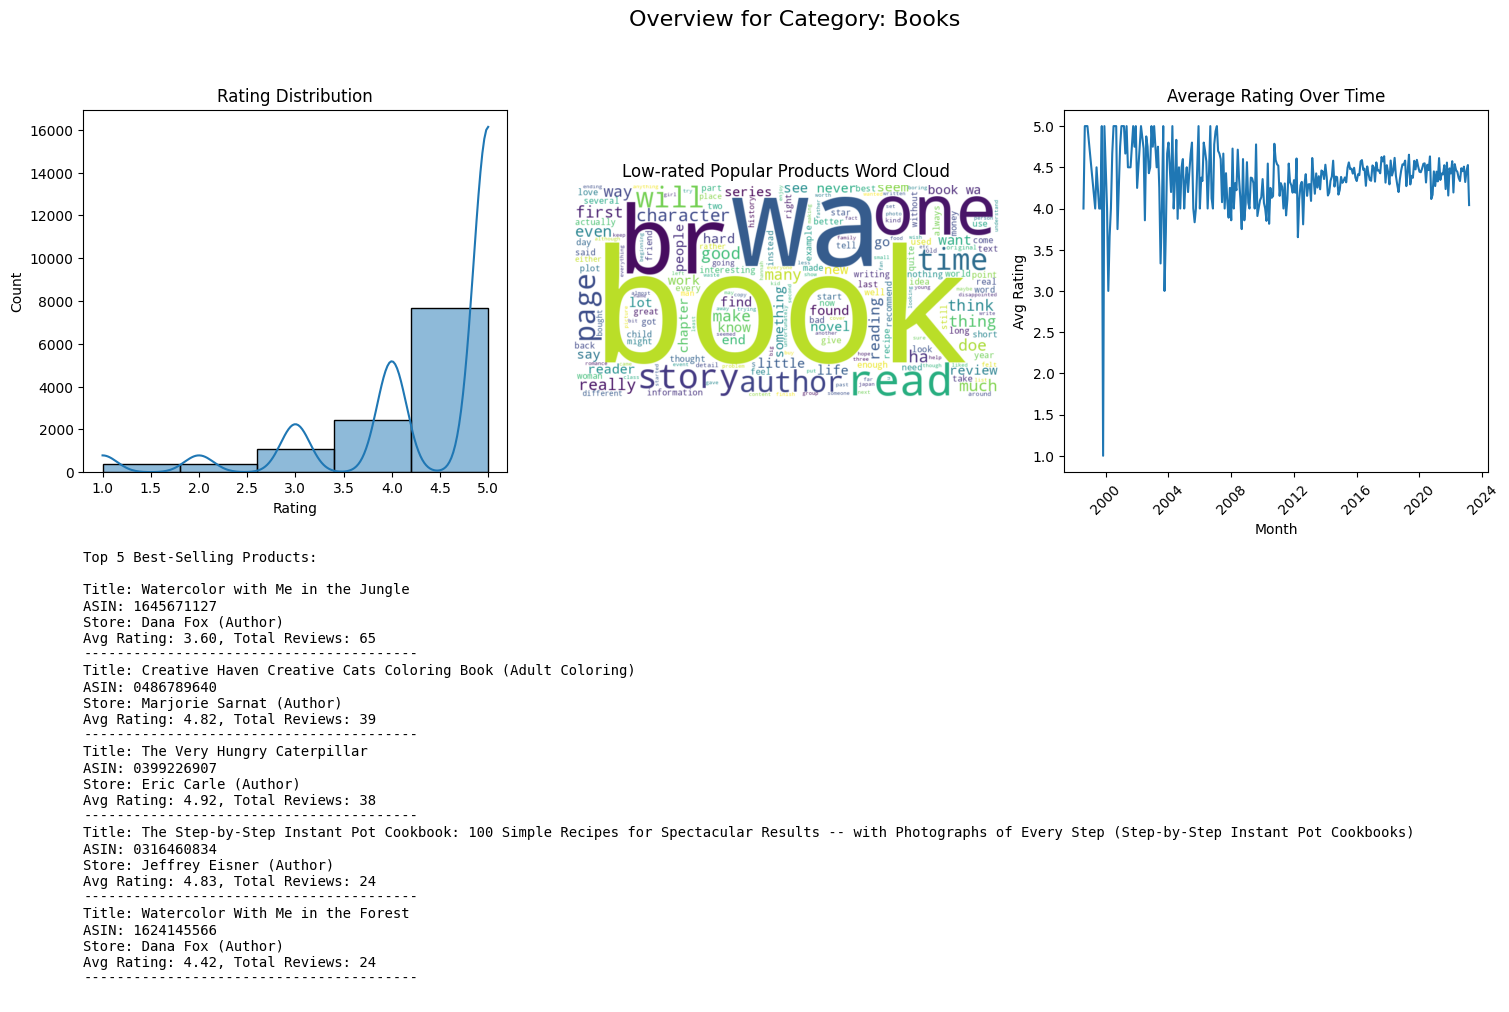

Visualizing: All_Beauty


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


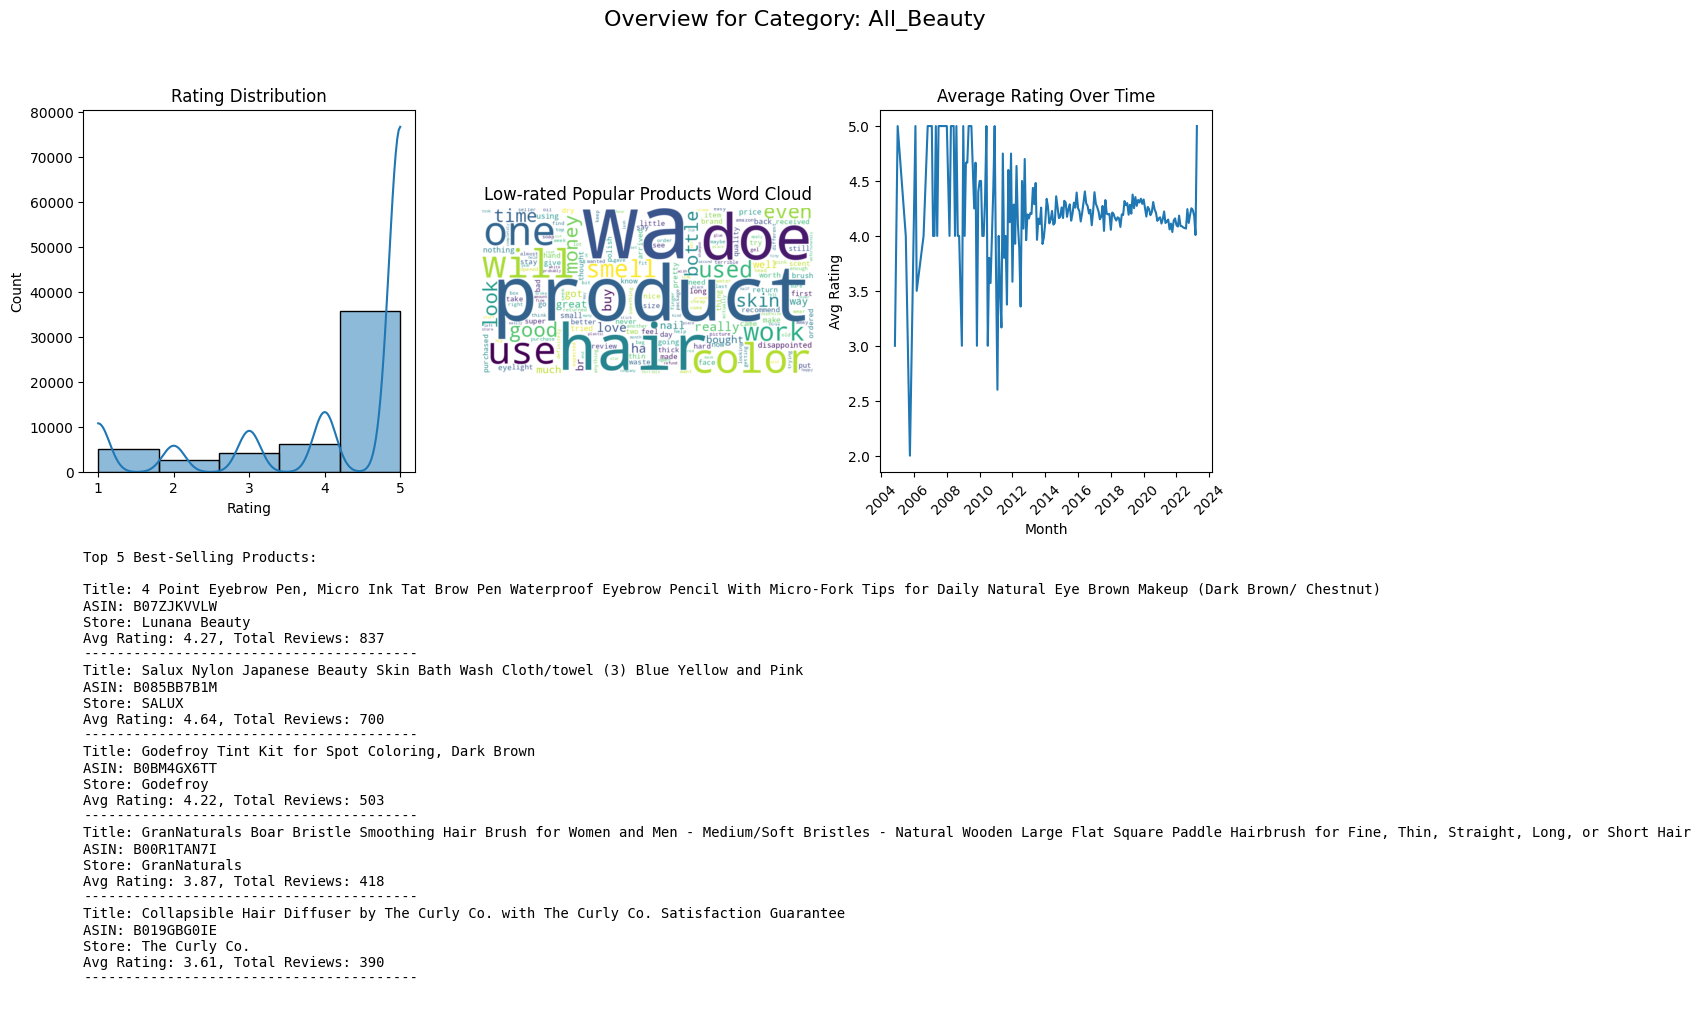

Visualizing: Electronics


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


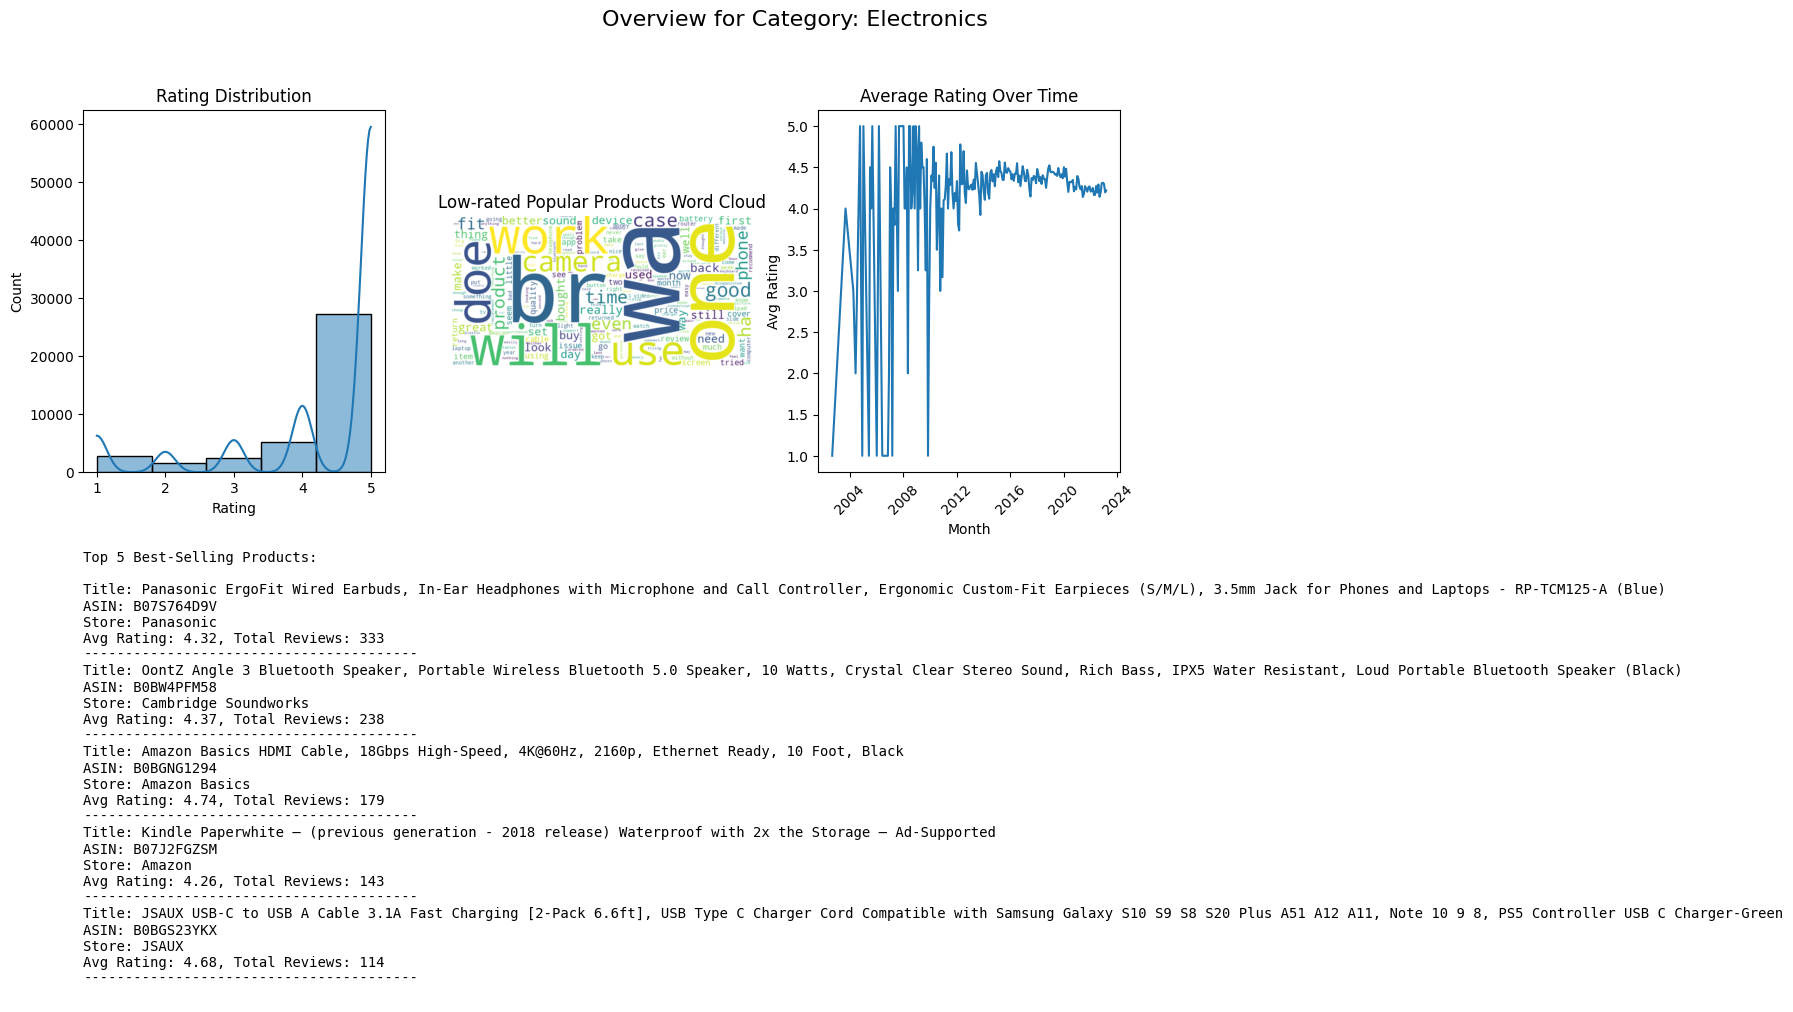

Visualizing: Movies_and_TV


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


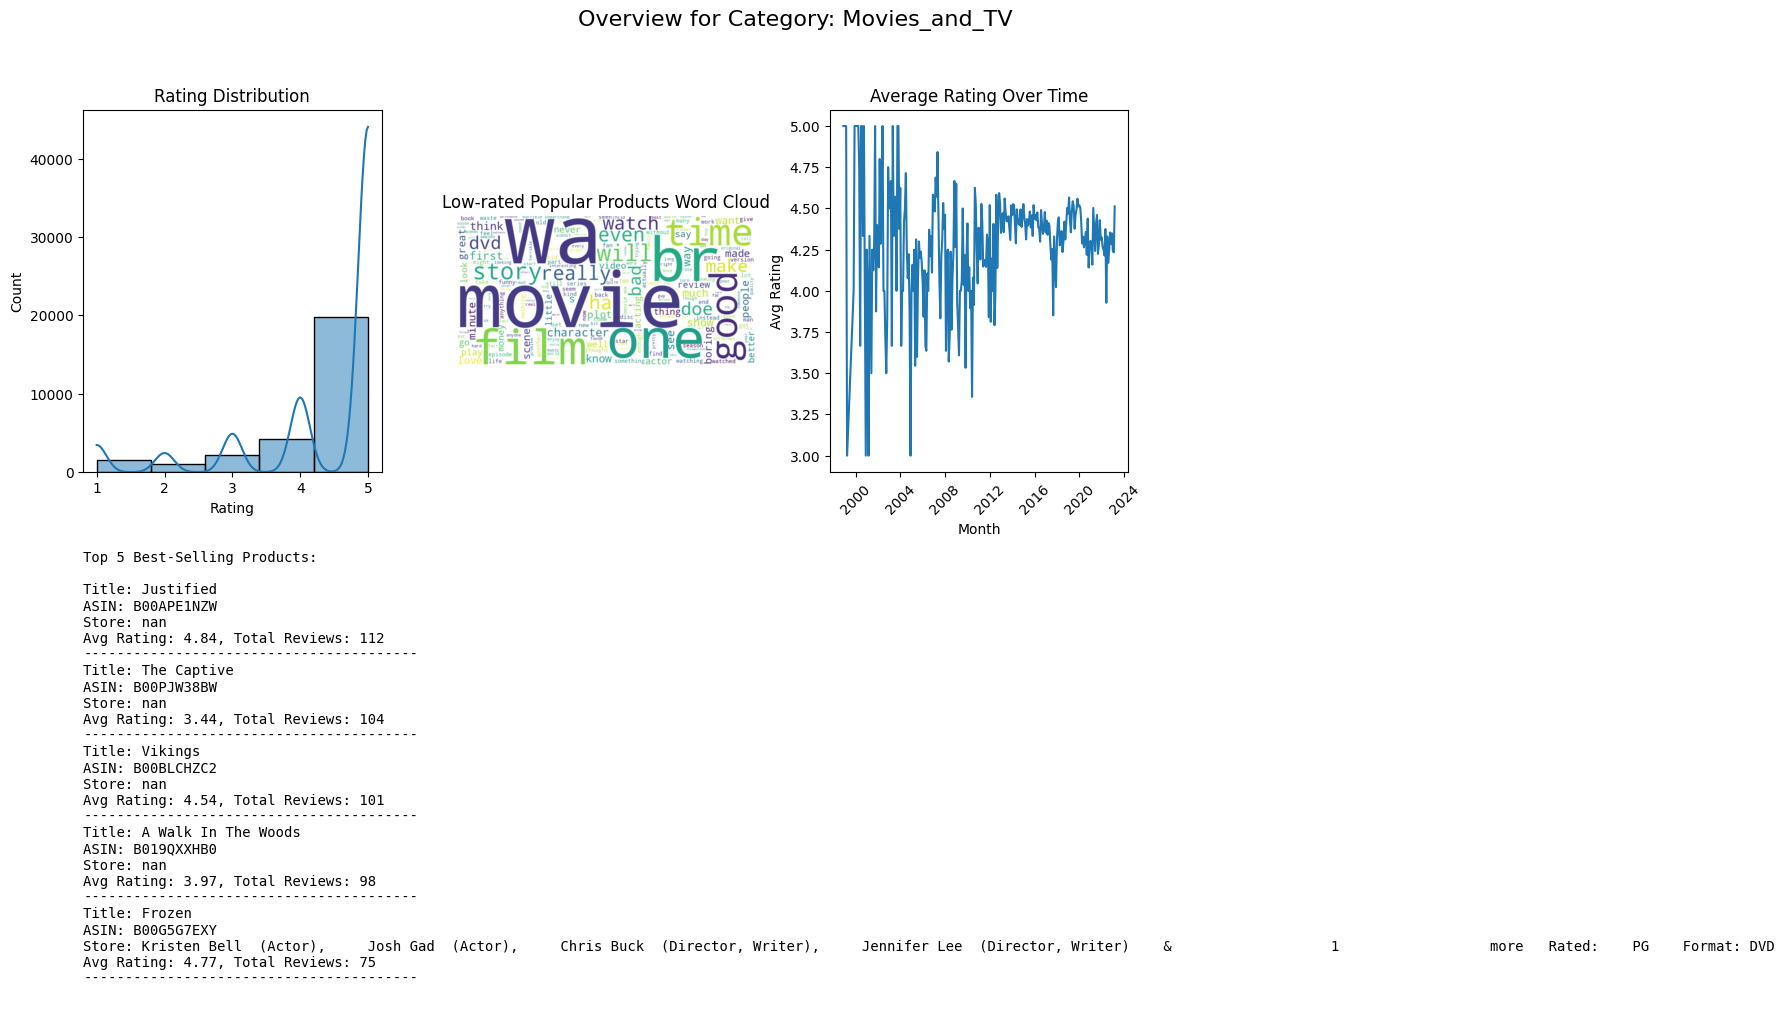

Visualizing: Sports_and_Outdoors


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


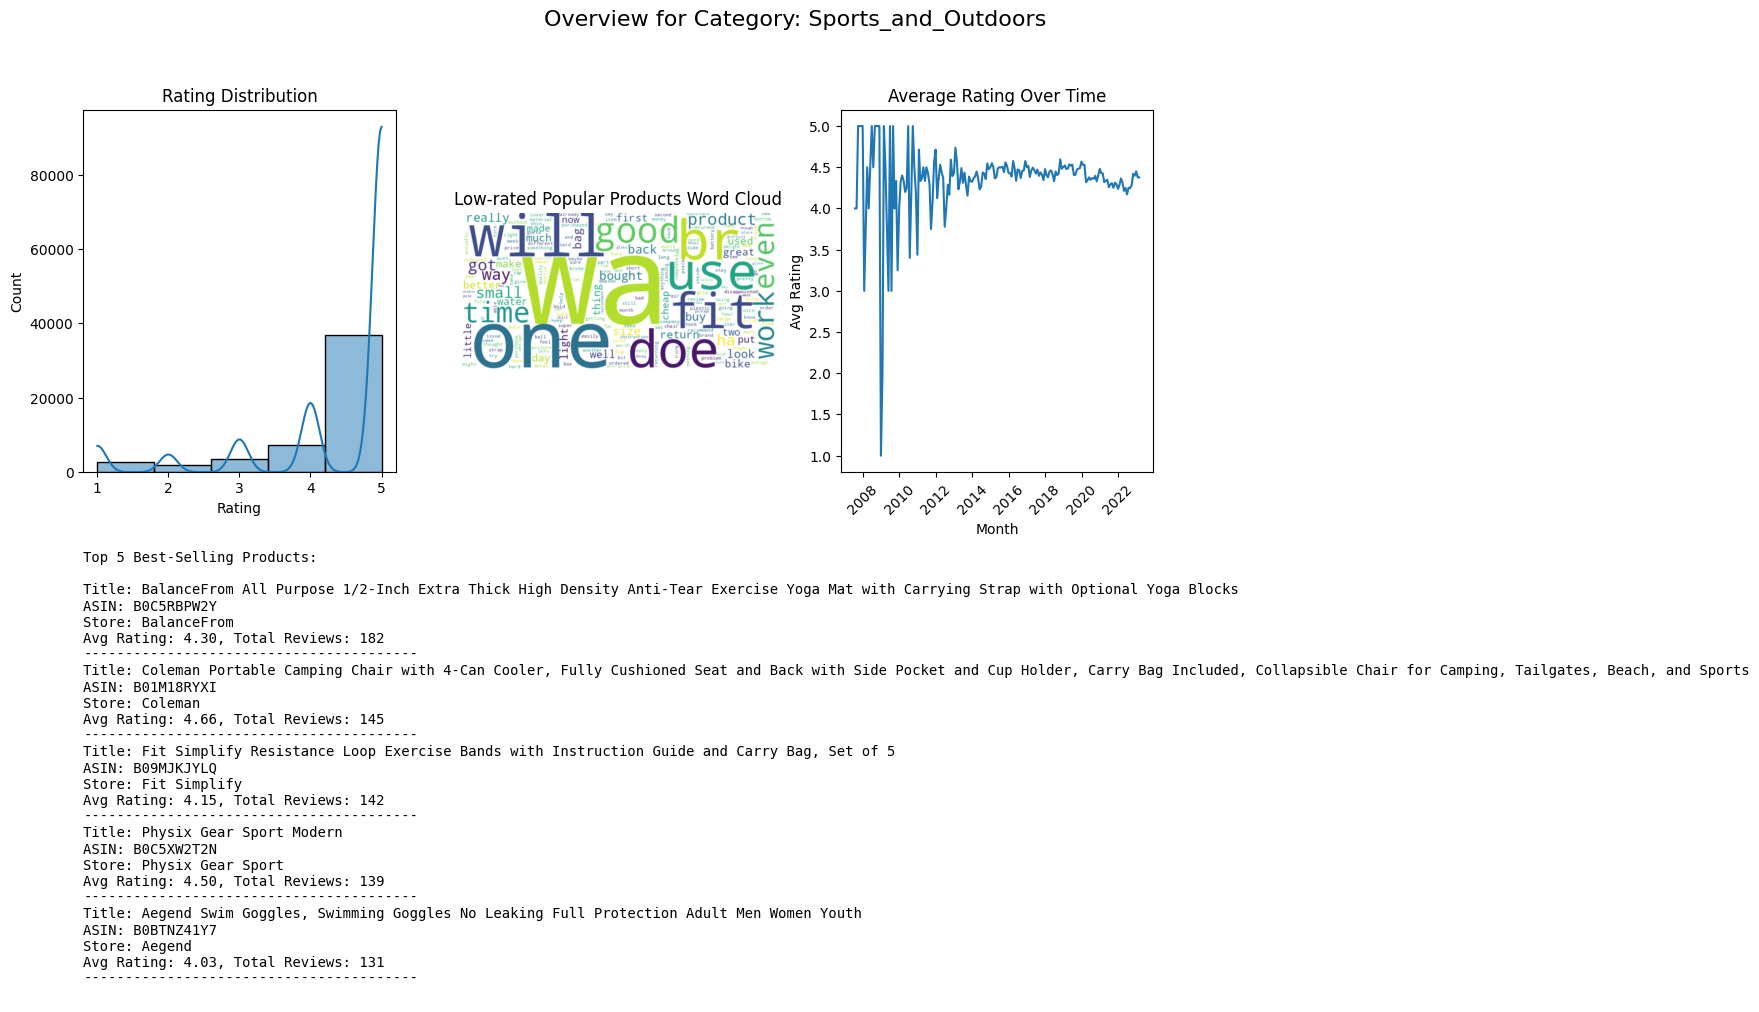

In [6]:
for category, *_ in datasets_info:
    print(f"Visualizing: {category}")
    df = pd.read_csv(f"{category}_cleaned.csv")
    df["timestamp"] = pd.to_datetime(df["timestamp"])
    df["month"] = df["timestamp"].dt.to_period("M").dt.to_timestamp()

    df["rating"] = pd.to_numeric(df["rating"], errors="coerce")
    df = df.dropna(subset=["rating"])

    stats = df.groupby("parent_asin").agg(
        avg_rating=("rating", "mean"),
		count=("rating", "count")
	).reset_index()

    bad_asins = stats[
    	(stats["count"] >= 0) & (stats["avg_rating"] < 3)
	]["parent_asin"]

    bad_text = " ".join(df[df["parent_asin"].isin(bad_asins)]["cleaned_text"].dropna())
    wordcloud = None
    if bad_text.strip():
        wordcloud = WordCloud(width=800, height=400, background_color="white").generate(bad_text)

    # Prepare trend data
    trend = df.groupby("month")["rating"].mean().reset_index()

    # Prepare top products text
    top5 = df["parent_asin"].value_counts().head(5).index
    top_products_info = ""
    for asin in top5:
        item = df[df["parent_asin"] == asin].iloc[0]
        avg_rating = df[df["parent_asin"] == asin]["rating"].mean()
        total_reviews = len(df[df["parent_asin"] == asin])
        top_products_info += (
            f"Title: {item.get('title_meta', 'N/A')}\n"
            f"ASIN: {asin}\n"
            f"Store: {item.get('store', 'Unknown')}\n"
            f"Avg Rating: {avg_rating:.2f}, Total Reviews: {total_reviews}\n"
            f"{'-'*40}\n"
        )

    # Create subplots
    fig = plt.figure(figsize=(16, 10))
    fig.suptitle(f"Overview for Category: {category}", fontsize=16, y=1.02)
    gs = GridSpec(2, 3, figure=fig)

    # Histogram
    ax1 = fig.add_subplot(gs[0, 0])
    sns.histplot(df["rating"], bins=5, kde=True, ax=ax1)
    ax1.set_title("Rating Distribution")
    ax1.set_xlabel("Rating")
    ax1.set_ylabel("Count")

    # Word Cloud
    ax2 = fig.add_subplot(gs[0, 1])
    ax2.set_title("Low-rated Popular Products Word Cloud")
    if wordcloud:
        ax2.imshow(wordcloud, interpolation="bilinear")
        ax2.axis("off")
    else:
        ax2.text(0.5, 0.5, "No data for word cloud", ha='center', va='center', fontsize=12)
        ax2.axis("off")

    # Trend Line
    ax3 = fig.add_subplot(gs[0, 2])
    sns.lineplot(data=trend, x="month", y="rating", ax=ax3)
    ax3.set_title("Average Rating Over Time")
    ax3.set_xlabel("Month")
    ax3.set_ylabel("Avg Rating")
    ax3.tick_params(axis='x', rotation=45)

    # Text Box for Top Products
    ax4 = fig.add_subplot(gs[1, :])
    ax4.axis("off")
    ax4.text(0, 1, f"Top 5 Best-Selling Products:\n\n{top_products_info}", ha='left', va='top', fontsize=10, family='monospace')

    plt.tight_layout()
    plt.subplots_adjust(top=0.92)
    plt.show()


### Task 2: Feature Engineering with Sentiment Scores and Ratings

#### SentimentScoreWithRating Class

This class combines the **text sentiment** of a review with its **numeric rating (1–5)** to generate a more informative sentiment score.

---

#### 1. Sentiment Extraction

- Uses either **VADER** or a **Hugging Face model** (`DistilBERT`, `RoBERTa`, or `BERT`)
- Converts review text to a sentiment score in the range:

$$
\text{sentiment\_score} \in [-1, 1]
$$

---

#### 2. Weighted Sentiment + Rating

To balance sentiment from text and numeric rating:

$$
\text{final\_score} = w_1 \cdot \text{sentiment\_score} + w_2 \cdot \text{normalized\_rating}
$$

where:

$$
\text{normalized\_rating} = \frac{\text{rating} - 1}{4}
$$

Default weights: \( w_1 = 0.5 \), \( w_2 = 0.5 \)

---

#### 3. Rating-Adjusted Sentiment

Boost or reduce sentiment depending on how strong the rating is:

- Add adjustment (e.g. +0.2) if rating is 4 or 5  
- Subtract adjustment (e.g. -0.2) if rating is 1 or 2

This ensures the final score reflects both tone and user satisfaction.

---

In [7]:
class SentimentScoreWithRating:
    def __init__(self, method="vader"):
        """
        method: "vader" or one of ["distilbert", "roberta", "bert"]
        """
        self.method = method.lower()
        if self.method == "vader":
            self.analyzer = SentimentIntensityAnalyzer()
        elif self.method in ["distilbert", "roberta", "bert"]:
            model_map = {
                "distilbert": "distilbert-base-uncased-finetuned-sst-2-english",
                "roberta": "cardiffnlp/twitter-roberta-base-sentiment",
                "bert": "nlptown/bert-base-multilingual-uncased-sentiment"
            }
            self.analyzer = pipeline("sentiment-analysis", model=model_map[self.method])
        else:
            raise ValueError("Unsupported method")

    def extract_sentiment_score(self, text):
        """
        Returns a sentiment score in range [-1, +1]
        """
        if self.method == "vader":
            score = self.analyzer.polarity_scores(text)["compound"]
            return score
        else:
            result = self.analyzer(text[:512])[0]
            label = result["label"]

            if self.method == "distilbert":
                return 1.0 if "positive" in label.lower() else -1.0

            elif self.method == "roberta":
                # LABEL_0 = negative, LABEL_1 = neutral, LABEL_2 = positive
                if label == "LABEL_2":
                    return 1.0
                elif label == "LABEL_0":
                    return -1.0
                else:
                    return 0.0

            elif self.method == "bert":
                # label is '1 star', '2 stars', ..., '5 stars'
                stars = int(label.split()[0])
                return (stars - 3) / 2  # Maps 1→-1, 3→0, 5→+1

            else:
                raise ValueError("Unsupported method")


    def normalize_rating(self, rating):
        """
        Normalize rating from 1-5 stars to 0-1
        """
        return (rating - 1) / 4

    def sentiment_score_weighted_text_rating(self, text, rating, w_text=0.5, w_rating=0.5):
        """
        Combine text sentiment and normalized rating via weighted average
        """
        sentiment = self.extract_sentiment_score(text)
        norm_rating = self.normalize_rating(rating)
        combined_score = w_text * sentiment + w_rating * norm_rating
        return combined_score

    def sentiment_score_rating_adjusted(self, text, rating, adjustment=0.2):
        """
        Adjust sentiment based on rating intensity
        """
        sentiment = self.extract_sentiment_score(text)

        # Adjust based on rating range
        if rating >= 4:
            sentiment = min(sentiment + adjustment, 1.0)
        elif rating <= 2:
            sentiment = max(sentiment - adjustment, -1.0)
        # If rating == 3 → no adjustment

        return sentiment


### Task 3: Feature Engineering with Price Metrics

We created two new features to improve comparability between products:

---

#### 1. Weighted Rating  
To reduce the bias from products with few reviews, we used:

$$
\text{weighted\_rating} = \text{average\_rating} \times \log(\text{rating\_number} + 1)
$$

This boosts trust in ratings with more votes and penalizes small-sample anomalies.

---

#### 2. Price per Unit  
To compare products fairly across sizes (e.g., 500ml vs 250ml), we extracted quantities like `ml`, `g`, `oz`, and computed:

$$
\text{price\_per\_unit} = \frac{\text{price}}{\text{quantity}}
$$

If no quantity was found, we assumed `quantity = 1`.

In [8]:
for category, *_ in datasets_info:
    print(f"\nFeature Engineering for: {category}")

    # Load the cleaned dataset
    df = pd.read_csv(f"{category}_cleaned.csv")

    # Ensure numeric types
    df["average_rating"] = pd.to_numeric(df["average_rating"], errors='coerce')
    df["rating_number"] = pd.to_numeric(df["rating_number"], errors='coerce')
    df["price"] = pd.to_numeric(df["price"], errors='coerce')

    # 1. Weighted Rating
    df["weighted_rating"] = df["average_rating"] * np.log(df["rating_number"] + 1)

    # 2. Quantity extraction and pattern tracking
    quantity_patterns = [
		r"(\d+\.?\d*)\s*(?:ml|milliliter)",
		r"(\d+\.?\d*)\s*(?:fl\s*?oz|fluid ounce)",
		r"(\d+\.?\d*)\s*(?:g|gram)",
		r"(\d+\.?\d*)\s*(?:kg|kilogram)",
		r"(\d+\.?\d*)\s*(?:lb|pound)s?",
		r"(\d+\.?\d*)\s*(?:count|ct|pack|pk)",
		r"(\d+\.?\d*)\s*(?:l|liter)s?",
		r"(\d+\.?\d*)\s*mg",
		r"(\d+)\s*pieces?",
		r"(\d+)\s*tablets?",
		r"(?i)(\d+)\s*(?:count|ct|pack|pk|pc|pcs|piece|bag|bottle|bar|serving)s?\b",
		r"(?i)(\d+\.?\d*)\s*(?:ounce|oz)s?",
		r"(?i)\b(\d+)\s*per\s*(?:pack|bottle)\b",
		r"(?i)(\d+)\s*(?:sheets|pads|wipes)\b",
		r"(?i)(\d+)\s*(?:inch|in)\b",
	]

    df["quantity_extracted"] = np.nan
    df["matched_pattern"] = np.nan

    for pattern in quantity_patterns:
        title_match = df["title"].str.extract(pattern, expand=True)
        desc_match = df["description"].str.extract(pattern, expand=True)

        title_qty = pd.to_numeric(title_match[0], errors="coerce")
        desc_qty = pd.to_numeric(desc_match[0], errors="coerce")

        match = title_qty.combine_first(desc_qty)

        mask = df["quantity_extracted"].isna() & match.notna()
        df.loc[mask, "quantity_extracted"] = match[mask]
        df.loc[mask, "matched_pattern"] = pattern

    # Default quantity = 1 if nothing was extracted
    df["quantity_extracted"] = df["quantity_extracted"].fillna(1)

    # Compute price per unit
    df["price_per_unit"] = df["price"] / df["quantity_extracted"]
    df["price_per_unit"] = df["price_per_unit"].replace([np.inf, -np.inf], np.nan)

    # Print sample of ALL features
    sample_all = df[[
        "title", "price", "average_rating", "rating_number",
        "weighted_rating", "quantity_extracted", "price_per_unit"
    ]].dropna().head(10)

    print("\nSample of generalized engineered features (top 10):")
    print(sample_all.to_string(index=False))



Feature Engineering for: Books


/tmp/ipykernel_13/3423638460.py:48: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '(\d+\.?\d*)\s*(?:ml|milliliter)' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[mask, "matched_pattern"] = pattern



Sample of generalized engineered features (top 10):
                                                 title  price  average_rating  rating_number  weighted_rating  quantity_extracted  price_per_unit
Half the size of her other books, but same price! WTH?  15.89             4.5          587.0        28.695271                 1.0       15.890000
                               Granddaughter loves it!   4.59             4.9        36580.0        51.485693                 1.0        4.590000
                      Fun and adventurous book for all  23.17             5.0            3.0         6.931472                18.0        1.287222
                                Refreshing perspective  29.35             4.8          497.0        29.810880                 1.0       29.350000
                          What rock have I been under?  13.49             4.5         6034.0        39.173990                 1.0       13.490000
                           Excellent read for all ages  14.99          

/tmp/ipykernel_13/3423638460.py:48: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '(\d+\.?\d*)\s*(?:ml|milliliter)' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[mask, "matched_pattern"] = pattern



Sample of generalized engineered features (top 10):
                                        title  price  average_rating  rating_number  weighted_rating  quantity_extracted  price_per_unit
                                         Yes!  21.98             4.4            699        28.824753                 1.0           21.98
                                 Pretty Color   7.10             3.8             32        13.286729                 1.0            7.10
                                      Just ok  49.95             3.3             25        10.751719                 1.0           49.95
              You won’t regret this purchase.   7.99             3.7           2940        29.550068                 1.0            7.99
                                  Ineffective   9.99             4.5           3264        36.409568                 1.0            9.99
                                        Love!  11.99             4.5           5636        38.866983                 1.0     

/tmp/ipykernel_13/3423638460.py:48: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '(\d+\.?\d*)\s*(?:ml|milliliter)' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[mask, "matched_pattern"] = pattern



Sample of generalized engineered features (top 10):
                                                title  price  average_rating  rating_number  weighted_rating  quantity_extracted  price_per_unit
                                          Good choice   6.92             4.7        81186.0        53.131199                 1.0            6.92
                                     Good alarm clock  88.26             4.4        13310.0        41.783923                 1.0           88.26
                              Nice lightweight sleeve  19.99             4.5         8841.0        40.892708                 1.0           19.99
         Did anyone use this for a recessed TV mount?   6.60             4.7         6103.0        40.968488                 1.0            6.60
                                   Easy and plentiful   8.99             4.1         1425.0        29.776777                 1.0            8.99
                                       good and cheap  20.99             4.2 

/tmp/ipykernel_13/3423638460.py:48: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '(\d+\.?\d*)\s*(?:ml|milliliter)' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[mask, "matched_pattern"] = pattern



Sample of generalized engineered features (top 10):
                           title  price  average_rating  rating_number  weighted_rating  quantity_extracted  price_per_unit
                         Awesome   9.36             4.8        12321.0        45.211879                 1.0            9.36
                      Four Stars  12.99             3.2          333.0        18.595651                 1.0           12.99
                      Five Stars  12.40             4.6        13923.0        43.890299                 1.0           12.40
          GOOD TO WATCH ONE TIME  12.90             4.5          989.0        31.039672                 1.0           12.90
                      Five Stars 145.41             4.5          260.0        25.040342                 1.0          145.41
        COLUMBO movie collection  13.40             4.7          383.0        27.968020                 1.0           13.40
               BURST ANGEL vol-4   6.26             4.0            1.0         

/tmp/ipykernel_13/3423638460.py:48: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '(\d+\.?\d*)\s*(?:ml|milliliter)' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[mask, "matched_pattern"] = pattern



Sample of generalized engineered features (top 10):
                              title  price  average_rating  rating_number  weighted_rating  quantity_extracted  price_per_unit
                        Works great  22.95             4.3           40.0        15.968360                 1.0           22.95
                            Perfect  25.87             4.6          681.0        30.015136                 1.0           25.87
                   Awesome leathers 149.95             4.8          165.0        24.537541                 1.0          149.95
          Nice product, sizing off!  12.99             3.9          386.0        23.237856                 1.0           12.99
                 Nice quality shirt  37.00             4.1           64.0        17.114988                 1.0           37.00
                         Five Stars  19.00             4.6         4134.0        38.305316                 1.0           19.00
              Can't beat the price!  18.99             4.6

## Part 2 - Learning Tasks


Clustering for Books


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:8

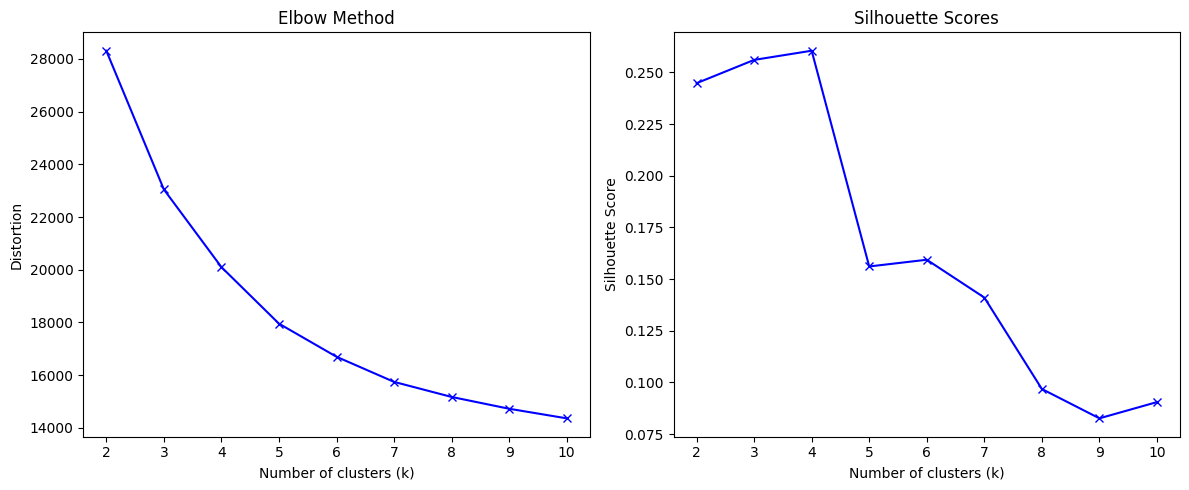

Optimal k for clusters: 4


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


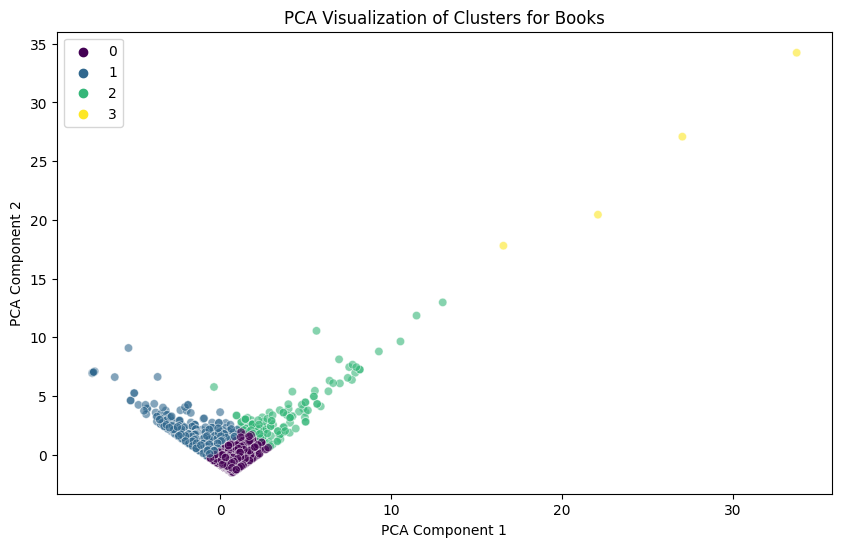


Cluster Statistics:
         average_rating  normalized_price  title_meta
cluster                                              
0              4.631447          0.012020        8430
1              4.058185          0.010043        3372
2              4.540299          0.114673         134
3              4.500000          0.735300           4

Cluster 0 Sample Products:
                                    title_meta  average_rating  price
       The Winter Sea (The Scottish series, 1)             4.5  11.00
           Virtue of Death (Earthbound Angels)             4.4  12.99
Mary Thomas's Dictionary of Embroidery Stiches             4.4   9.86

Cluster 1 Sample Products:
                                    title_meta  average_rating  price
                                    Saturn Run             4.1  14.96
   Dwellers in the Crucible (Star Trek, No 25)             4.1   1.49
The Complete Idiot's Guide to Spices and Herbs             3.6   9.21

Cluster 2 Sample Products:
           

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:8

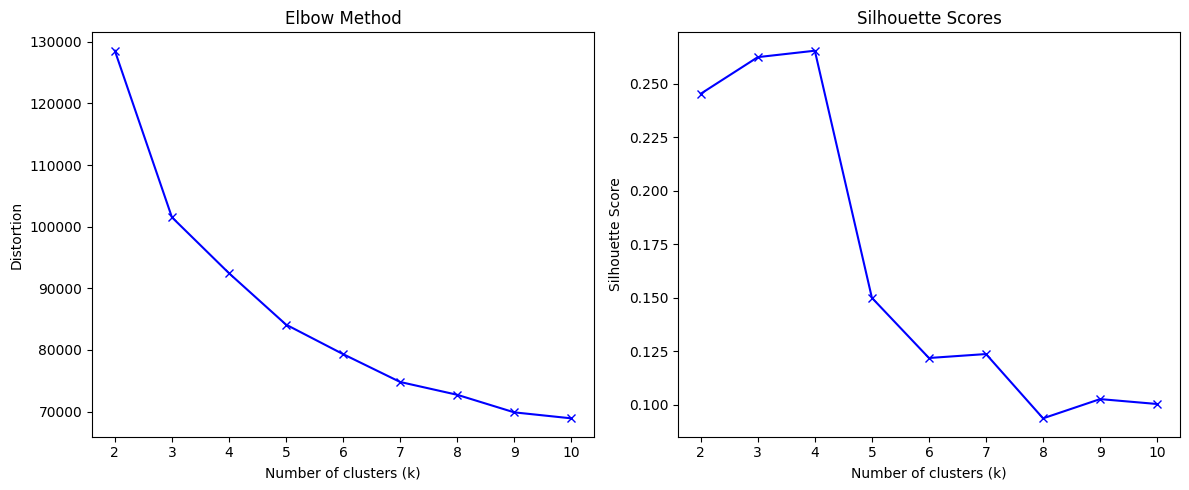

Optimal k for clusters: 4


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


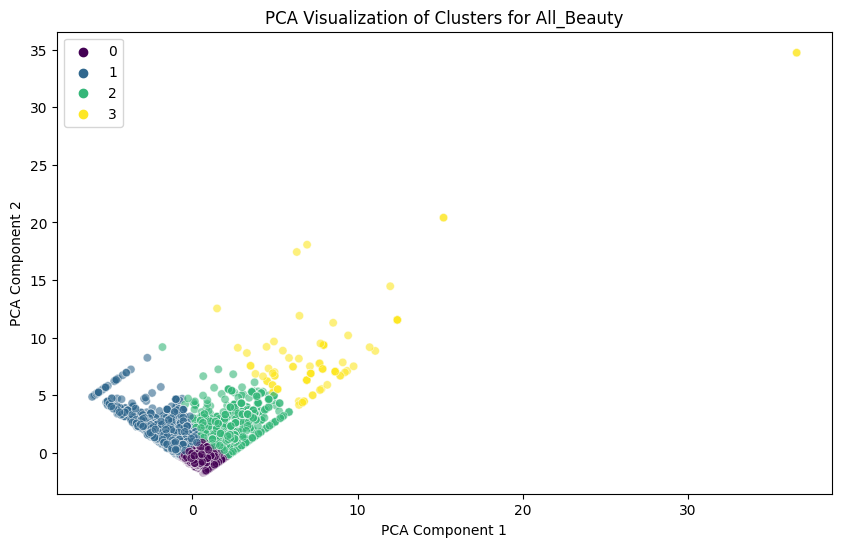


Cluster Statistics:
         average_rating  normalized_price  title_meta
cluster                                              
0              4.501147          0.012539       36092
1              3.772615          0.011951       15348
2              4.398417          0.066673        2653
3              4.250758          0.241374         132

Cluster 0 Sample Products:
                                                                                                                                   title_meta  average_rating  price
Stainless Steel Tweezers with Curved Serrated Tip Multipurpose Tweezers Sewing Machine Tweezers Forceps Tweezers for Craft (Silver, 6 Pieces)             4.4  10.79
                                        Tree of Life Vitamin C Facial Toner for Minimizing Pores | Toner and Makeup Remover for Face, 4 Fl oz             4.4  14.99
                                                                        Tarte Rainforest Of The Sea Eyeshadow Palette Vol. II Limite

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:8

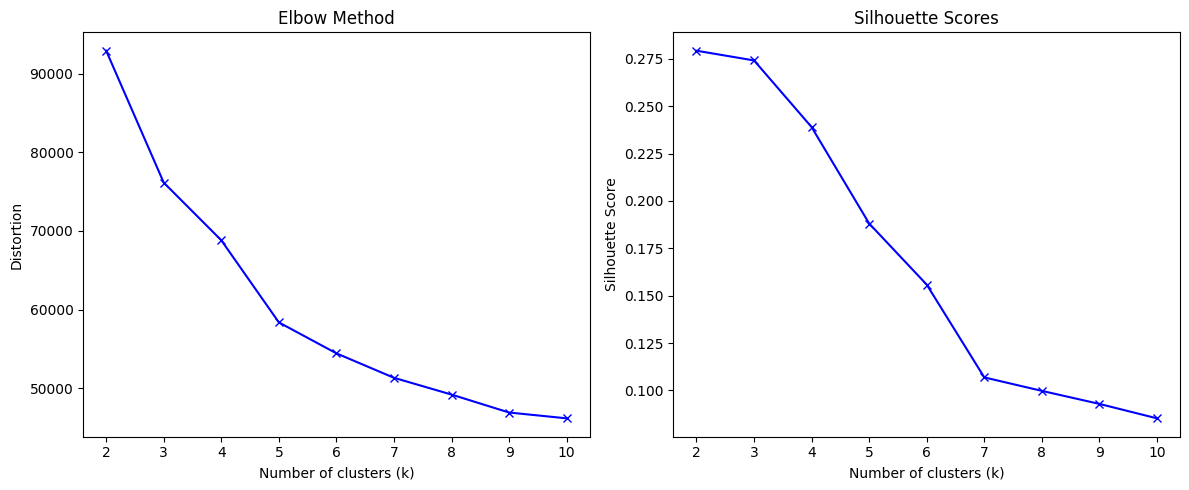

Optimal k for clusters: 2


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


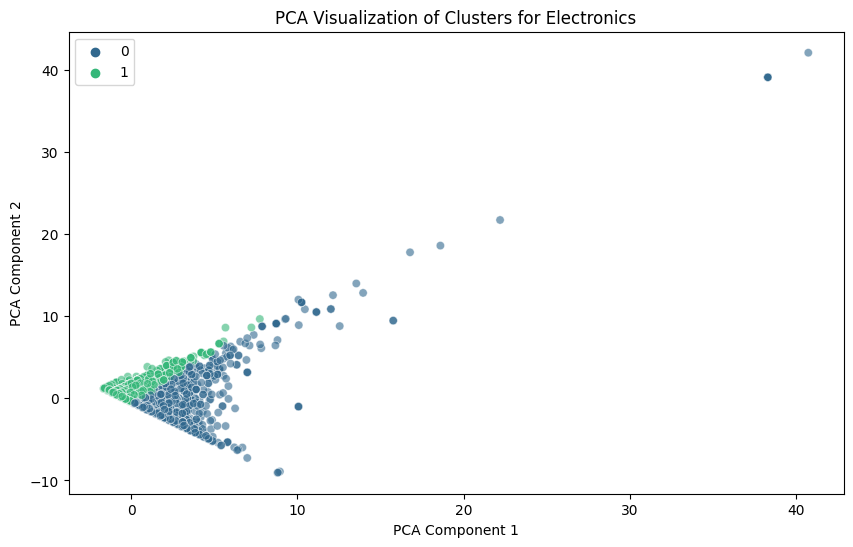


Cluster Statistics:
         average_rating  normalized_price  title_meta
cluster                                              
0              4.118252          0.008018       11385
1              4.588047          0.004770       28059

Cluster 0 Sample Products:
                                                                                                                title_meta  average_rating   price
                                                      SAMSUNG Galaxy S9+ Factory Unlocked Smartphone 64GB - Midnight Black             4.4  555.35
Atlantic Large Format Laptop Tray - 27 Inches Wide, 13.75 Inches Deep, 2 Sections, Smooth Finish Legs PN 33935843 in Black             3.9   18.85
                                                       Epson Home Cinema 5050UB 4K PRO-UHD 3-Chip Projector with HDR,White             4.7 2879.00

Cluster 1 Sample Products:
                                                                                                                       

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:8

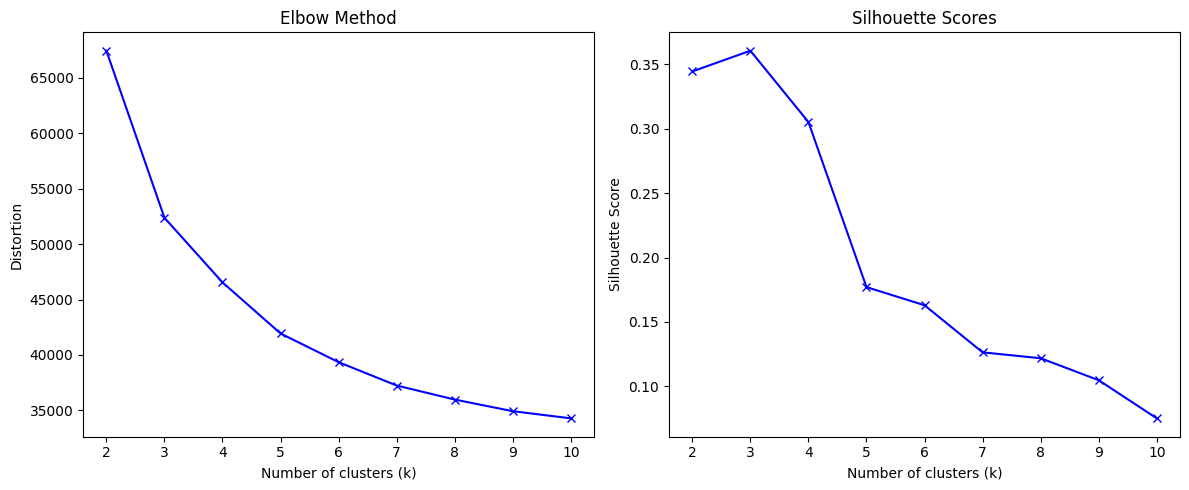

Optimal k for clusters: 3


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


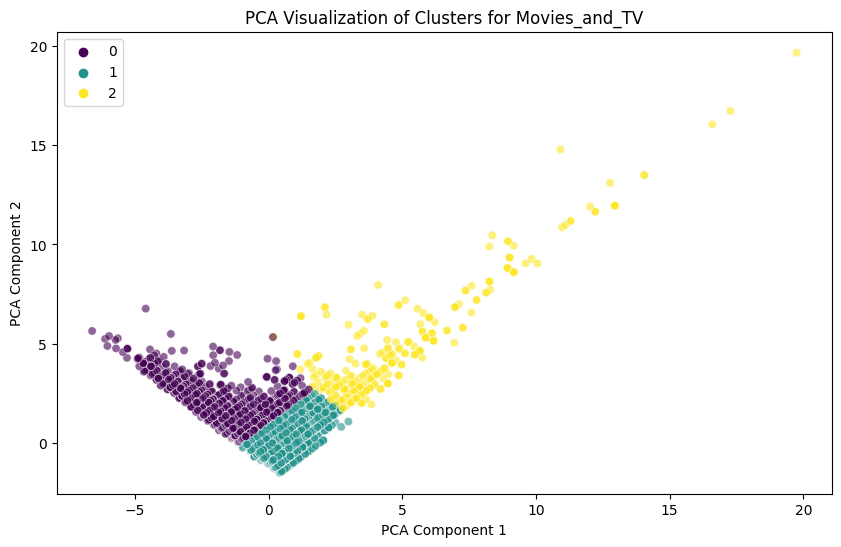


Cluster Statistics:
         average_rating  normalized_price  title_meta
cluster                                              
0              3.986485          0.024892        4728
1              4.684467          0.026860       23891
2              4.584367          0.251506         371

Cluster 0 Sample Products:
                                                                  title_meta  average_rating  price
Bellini - Norma / Patane, Caballe, Vickers, Veasey, Theatre Antique d'Orange             4.1  30.99
                                                              The Black Book             2.7   9.99
                                                    Taxi Brooklyn - Saison 1             4.1  25.66

Cluster 1 Sample Products:
                                        title_meta  average_rating  price
                                         Deception             4.7  53.85
Harry Potter: Years One-Five (Full Screen Edition)             4.4  44.44
                         Advent

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:8

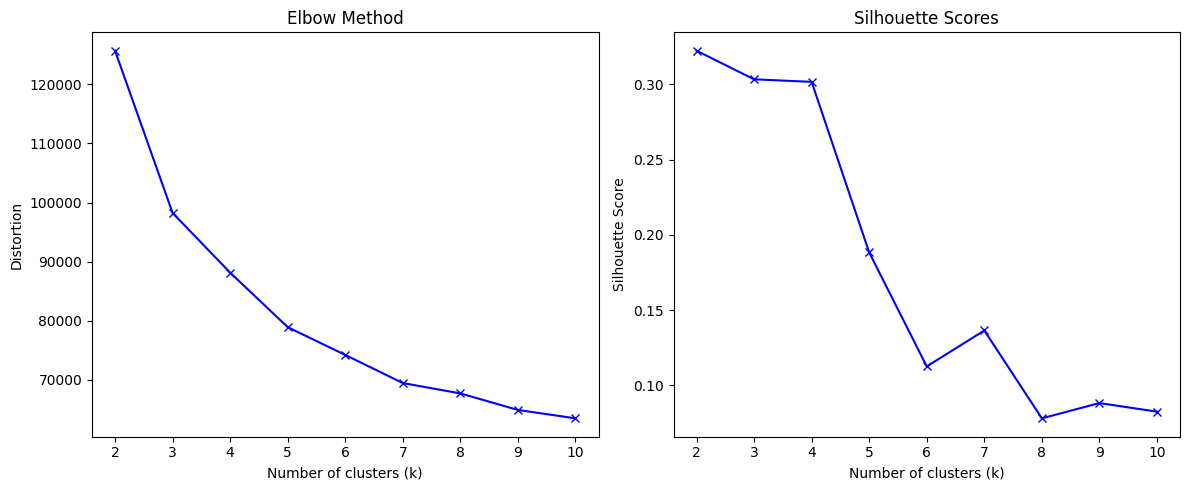

Optimal k for clusters: 2


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


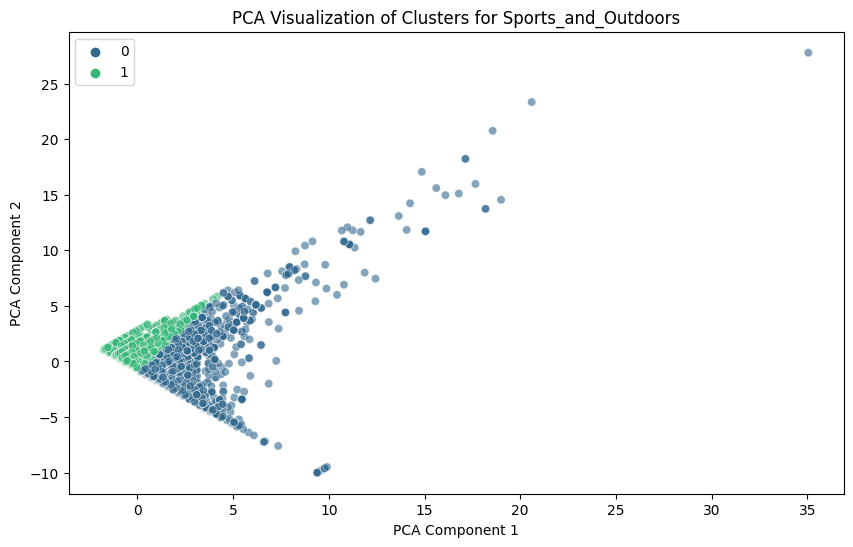


Cluster Statistics:
         average_rating  normalized_price  title_meta
cluster                                              
0              4.128594          0.019507       10978
1              4.592263          0.009653       41335

Cluster 0 Sample Products:
                                                                                                                                                                                title_meta  average_rating  price
                                                                                                                                                                        SUNLITE Toe Straps             4.3  10.89
              Bikeroo Bike Seat Cushion - Padded Gel Bike Seat Cover, Compatible with Peloton, Adjustable for Men & Womens Comfort on Stationary Exercise, Mountain and Road Bicycle Seats             4.2  19.81
Newbaum's Cloth Bike Handlebar Tape (Orange), 10 ft Roll Bike Bar Grip Tape (0.75” Wide), Cotton Bar Tape

In [9]:
def cluster_category(category):
    df = pd.read_csv(f"{category}_cleaned.csv")

    # Fill NaN values with empty string
    df['cleaned_title_meta'] = df['cleaned_title_meta'].fillna('')
    df['cleaned_description'] = df['cleaned_description'].fillna('')

    df['combined_text'] = df['cleaned_title_meta'] + " " + df['cleaned_description']

    # TF-IDF Vectorization
    tfidf = TfidfVectorizer(max_features=5000, stop_words='english', min_df=2, max_df=0.8)
    tfidf_matrix = tfidf.fit_transform(df['combined_text'])

    # Scale the numerical features
    numerical_features = df[['normalized_price', 'average_rating']].copy()
    # Fill NaN values in numerical features with mean or appropriate value
    numerical_features = numerical_features.fillna(numerical_features.mean())
    scaler = StandardScaler()
    numerical_scaled = scaler.fit_transform(numerical_features)

    feature_matrix = hstack([tfidf_matrix, numerical_scaled])

    # Elbow method to find the best K for clustering
    distortions = []
    silhouette_scores = []
    K_range = range(2, 11)

    for k in K_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(feature_matrix)
        distortions.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(feature_matrix, kmeans.labels_))

    # Plot Elbow method
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(K_range, distortions, 'bx-')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Distortion')
    plt.title('Elbow Method')

    # Plot Silhouette scores
    plt.subplot(1, 2, 2)
    plt.plot(K_range, silhouette_scores, 'bx-')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Scores')
    plt.tight_layout()
    plt.show()

    optimal_k = K_range[np.argmax(silhouette_scores)]
    print(f"Optimal k for clusters: {optimal_k}")

    # Perform clustering with the optimal number of clusters we found from elbow method
    kmeans = KMeans(n_clusters=optimal_k, random_state=42)
    clusters = kmeans.fit_predict(feature_matrix)
    df['cluster'] = clusters

    pca = PCA(n_components=2)
    reduced_features = pca.fit_transform(feature_matrix.toarray())

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=reduced_features[:, 0], y=reduced_features[:, 1],
                    hue=clusters, palette='viridis', alpha=0.6)
    plt.title(f'PCA Visualization of Clusters for {category}')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.show()

    # Analyze cluster characteristics
    cluster_stats = df.groupby('cluster').agg({
        'average_rating': 'mean',
        'normalized_price': 'mean',
        'title_meta': 'count'
    }).rename(columns={'title': 'count'})

    print("\nCluster Statistics:")
    print(cluster_stats)

    # Print sample products from each cluster
    for cluster_id in range(optimal_k):
        print(f"\nCluster {cluster_id} Sample Products:")
        sample_products = df[df['cluster'] == cluster_id][['title_meta', 'average_rating', 'price']].sample(3)
        print(sample_products.to_string(index=False))

    return df


# Perform clustering for each category
for category, *_ in datasets_info:
    print(f"\nClustering for {category}")
    clustered_df = cluster_category(category)
    clustered_df.to_csv(f"{category}_clustered.csv", index=False)

In [10]:
def recommendation_system(category):
    # Load clustered data
    df = pd.read_csv(f"{category}_clustered.csv")
    
    # Ensure we have required columns
    required_columns = ['user_id', 'parent_asin', 'rating', 'cleaned_title_meta', 
                       'cleaned_description', 'normalized_price', 'cluster']
    for col in required_columns:
        if col not in df.columns:
            raise ValueError(f"Missing required column: {col}")
    
    # Content-Based Filtering (Enhanced)
    print("\n=== Content-Based Filtering ===")
    
    # Combine text features more effectively
    df['combined_text'] = df['cleaned_title_meta'] + " " + df['cleaned_description']
    
    # Load pre-trained Word2Vec model
    word2vec_path = "/kaggle/input/googlenewsvectorsnegative300/GoogleNews-vectors-negative300.bin"
    word2vec_model = KeyedVectors.load_word2vec_format(word2vec_path, binary=True)
    
    def get_doc_vector(text):
        words = text.split()
        vectors = [word2vec_model[word] for word in words if word in word2vec_model]
        return np.mean(vectors, axis=0) if vectors else np.zeros(300)
    
    df['doc_vector'] = df['combined_text'].apply(get_doc_vector)
    item_vectors = np.stack(df['doc_vector'].values)
    cbf_similarity = cosine_similarity(item_vectors)
    
    def content_based_recommendations(item_id, top_n=5):
        """Content-based recommendations with predicted ratings"""
        try:
            idx = df[df['parent_asin'] == item_id].index[0]
            sim_scores = list(enumerate(cbf_similarity[idx]))
            sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
            
            recommendations = []
            for i, (item_idx, score) in enumerate(sim_scores[1:top_n+1], 1):
                item = df.iloc[item_idx]
                predicted_rating = min(5, max(1, item['average_rating'] * (1 + score/2)))
                recommendations.append({
                    'rank': i,
                    'asin': item['parent_asin'],
                    'title': item['title_meta'],
                    'predicted_rating': round(predicted_rating, 2),
                    'similarity_score': round(score, 3),
                    'price': item['price'],
                    'cluster': item['cluster']
                })
            return pd.DataFrame(recommendations)
        except:
            return pd.DataFrame(columns=['asin', 'title', 'predicted_rating', 'similarity_score'])
    
    # Collaborative Filtering
    print("\n=== Collaborative Filtering ===")
    
    # Create user-item matrix with explicit ratings
    user_item_matrix = df.pivot_table(
        index='user_id', 
        columns='parent_asin', 
        values='rating', 
        fill_value=0
    )
    
    # User-Based CF with rating prediction
    user_similarity = cosine_similarity(user_item_matrix)
    
    def predict_user_based_rating(user_id, item_id, k=5):
        """Predict rating using weighted average of similar users' ratings"""
        if user_id not in user_item_matrix.index or item_id not in user_item_matrix.columns:
            return 0
        
        user_idx = user_item_matrix.index.get_loc(user_id)
        item_idx = user_item_matrix.columns.get_loc(item_id)
        
        # Get similar users who have rated the item
        sim_users = []
        for other_user_idx, sim_score in enumerate(user_similarity[user_idx]):
            if other_user_idx == user_idx:
                continue  # skip self
            rating = user_item_matrix.iloc[other_user_idx, item_idx]
            if rating > 0:  # only consider users who rated the item
                sim_users.append((sim_score, rating))
        
        # Take top k similar users
        sim_users.sort(reverse=True)
        sim_users = sim_users[:k]
        
        if not sim_users:
            return df[df['parent_asin'] == item_id]['average_rating'].mean()
        
        # Weighted average prediction
        total_sim = sum(sim for sim, _ in sim_users)
        if total_sim == 0:
            return sum(rating for _, rating in sim_users) / len(sim_users)
        
        return sum(sim * rating for sim, rating in sim_users) / total_sim
    
    def user_based_recommendations(user_id, top_n=5, k_similar=5):
        """Generate recommendations with predicted ratings"""
        if user_id not in user_item_matrix.index:
            return pd.DataFrame()
        
        # Find items not rated by user
        user_idx = user_item_matrix.index.get_loc(user_id)
        unrated_items = [item for item in user_item_matrix.columns 
                        if user_item_matrix.iloc[user_idx][item] == 0]
        
        # Predict ratings for unrated items
        predictions = []
        for item_id in unrated_items[:100]:  # limit to top 100 for performance
            pred_rating = predict_user_based_rating(user_id, item_id, k_similar)
            predictions.append((item_id, pred_rating))
        
        # Get top recommendations
        predictions.sort(key=lambda x: x[1], reverse=True)
        recommendations = []
        for i, (item_id, rating) in enumerate(predictions[:top_n], 1):
            item = df[df['parent_asin'] == item_id].iloc[0]
            recommendations.append({
                'rank': i,
                'asin': item_id,
                'title': item['title_meta'],
                'predicted_rating': round(rating, 2),
                'price': item['price'],
                'cluster': item['cluster']
            })
        
        return pd.DataFrame(recommendations)
    
    # Item-Based CF with rating prediction
    item_similarity_cf = cosine_similarity(user_item_matrix.T)
    
    def predict_item_based_rating(user_id, item_id, k=5):
        """Predict rating using weighted average of similar items' ratings"""
        if user_id not in user_item_matrix.index or item_id not in user_item_matrix.columns:
            return 0
        
        user_idx = user_item_matrix.index.get_loc(user_id)
        item_idx = user_item_matrix.columns.get_loc(item_id)
        
        # Get user's ratings for similar items
        user_ratings = []
        for other_item_idx, sim_score in enumerate(item_similarity_cf[item_idx]):
            if other_item_idx == item_idx:
                continue  # skip self
            rating = user_item_matrix.iloc[user_idx, other_item_idx]
            if rating > 0:  # only consider items the user has rated
                user_ratings.append((sim_score, rating))
        
        # Take top k similar items
        user_ratings.sort(reverse=True)
        user_ratings = user_ratings[:k]
        
        if not user_ratings:
            return df[df['parent_asin'] == item_id]['average_rating'].mean()
        
        # Weighted average prediction
        total_sim = sum(sim for sim, _ in user_ratings)
        if total_sim == 0:
            return sum(rating for _, rating in user_ratings) / len(user_ratings)
        
        return sum(sim * rating for sim, rating in user_ratings) / total_sim
    
    def item_based_recommendations(user_id, top_n=5, k_similar=5):
        """Generate recommendations with predicted ratings"""
        if user_id not in user_item_matrix.index:
            return pd.DataFrame()
        
        # Find items not rated by user
        user_idx = user_item_matrix.index.get_loc(user_id)
        unrated_items = [item for item in user_item_matrix.columns 
                        if user_item_matrix.iloc[user_idx][item] == 0]
        
        # Predict ratings for unrated items
        predictions = []
        for item_id in unrated_items[:100]:  # limit to top 100 for performance
            pred_rating = predict_item_based_rating(user_id, item_id, k_similar)
            predictions.append((item_id, pred_rating))
        
        # Get top recommendations
        predictions.sort(key=lambda x: x[1], reverse=True)
        recommendations = []
        for i, (item_id, rating) in enumerate(predictions[:top_n], 1):
            item = df[df['parent_asin'] == item_id].iloc[0]
            recommendations.append({
                'rank': i,
                'asin': item_id,
                'title': item['title_meta'],
                'predicted_rating': round(rating, 2),
                'price': item['price'],
                'cluster': item['cluster']
            })
        
        return pd.DataFrame(recommendations)
    
    # Hybrid Approach (Enhanced)
    def hybrid_recommendations(user_id, item_id=None, top_n=5, 
                             cf_weight=0.7, cbf_weight=0.3):
        """Combine CF and CBF recommendations with configurable weights"""
        # Get CF recommendations
        cf_rec = user_based_recommendations(user_id, top_n*2)
        if not cf_rec.empty:
            cf_rec['score'] = cf_rec['predicted_rating'] * cf_weight
        
        # Get CBF recommendations
        cbf_rec = pd.DataFrame()
        if item_id is not None and item_id in df['parent_asin'].values:
            cbf_rec = content_based_recommendations(item_id, top_n*2)
            if not cbf_rec.empty:
                cbf_rec['score'] = cbf_rec['predicted_rating'] * cbf_weight
        
        # Combine and deduplicate
        hybrid_rec = pd.concat([cf_rec, cbf_rec])
        if not hybrid_rec.empty:
            hybrid_rec = hybrid_rec.drop_duplicates(subset=['asin'])
            hybrid_rec = hybrid_rec.sort_values('score', ascending=False).head(top_n)
        
        return hybrid_rec
    
    # Evaluation
    def evaluate_recommendations():
        """Basic evaluation by sampling test cases"""
        print("\n=== Evaluation ===")
        
        # Sample test cases
        test_users = df['user_id'].drop_duplicates().sample(2).tolist()
        test_items = df['parent_asin'].drop_duplicates().sample(2).tolist()
        
        for user_id in test_users:
            print(f"\nEvaluating for user {user_id}:")
            
            # User-based CF
            print("\nUser-Based CF Recommendations:")
            print(user_based_recommendations(user_id, top_n=3))
            
            # Item-based CF
            print("\nItem-Based CF Recommendations:")
            print(item_based_recommendations(user_id, top_n=3))
            
            # Hybrid (if we have an item context)
            if test_items:
                print("\nHybrid Recommendations (with item context):")
                print(hybrid_recommendations(user_id, test_items[0], top_n=3))
    
    # Run evaluation
    evaluate_recommendations()
    
    return {
        'content_based': content_based_recommendations,
        'user_based': user_based_recommendations,
        'item_based': item_based_recommendations,
        'hybrid': hybrid_recommendations
    }

# Build recommendation systems for each category
recommenders = {}
print(f"\n=== Building recommendation system for All_Beauty ===")
try:
    recommenders[category] = recommendation_system("All_Beauty")
except Exception as e:
    print(f"Error processing {category}: {str(e)}")
print(recommenders)


=== Building recommendation system for All_Beauty ===

=== Content-Based Filtering ===
Error processing Sports_and_Outdoors: 'float' object has no attribute 'split'
{}
